### About the Dataset

About the Dataset
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

The attributes are as follows: *Sales -- Unit sales (in thousands) at each location *Competitor Price -- Price charged by competitor at each location *Income -- Community income level (in thousands of dollars) *Advertising -- Local advertising budget for company at each location (in thousands of dollars) *Population -- Population size in region (in thousands) *Price -- Price company charges for car seats at each site *Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site *Age -- Average age of the local population *Education -- Education level at each location *Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location *US -- A factor with levels No and Yes to indicate whether the store is in the US or not


A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 


### Importing the necessary Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Importing the Dataset

In [6]:
def import_data():
    path='C:/Users/Sowmya Ganesh/Documents/Company_Data.csv'
    data=pd.read_csv(path)
    return data    

In [7]:
data = import_data()
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label.fit_transform(data[column])

In [10]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [ ]:
#Since our dependent variable y is 'Sales' we have to convert to categorical values

In [12]:
data.Sales.value_counts()

Sales
7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: count, Length: 336, dtype: int64

In [14]:
#Finding the minimum and maximum of Sales to categorize
min(data['Sales']),max(data['Sales'])

(0.0, 16.27)

In [15]:
#Those sales are more than 7.99 are 1 and below are 0
data['Sales'] = pd.cut(data['Sales'], bins=[0.0,7.99,16.99],labels = [0,1])

In [16]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


### Exploratory Data Analysis(EDA)

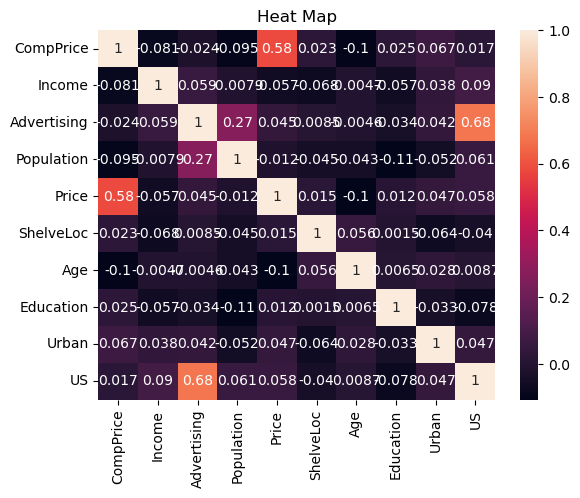

In [17]:
#PLotting a heatmap gives the correlation between the columns od the Dataset
path = 'C:/Users/Sowmya Ganesh/Documents/Company_data_graphs'
file_path = os.path.join(path, 'Heat_map.png')
cor = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

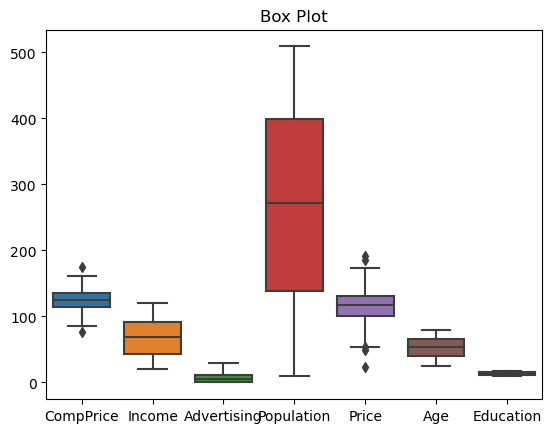

In [18]:
#Plotting a Boxplot We can infer the outliers in the data and impute them
path = 'C:/Users/Sowmya Ganesh/Documents/Company_data_graphs'
file_path = os.path.join(path, 'Box_plot.png')
sns.boxplot(data=data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.title('Box Plot')
plt.savefig(file_path)
plt.show()

In [ ]:
# Some outliers are found in the columns price and CompPrice.
# We need to impute the outliers in the data

In [19]:
#Imputing outliers of 'Price' column
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outliers = ((data['Price'] < lower) | (data['Price'] > upper))
data['Price'] = np.where(data['Price'] < lower, lower, data['Price'])
data['Price'] = np.where(data['Price'] > upper, upper, data['Price'] )


In [20]:
#Imputing outliers of the 'CompPrice' column
q1 = data['CompPrice'].quantile(0.25)
q3 = data['CompPrice'].quantile(0.75)
iqr = q3-q1
lower = q1 + 1.5 * iqr
upper = q3 - 1.5 * iqr

outliers = ((data['CompPrice']<lower) | (data['CompPrice'] > upper))  
data['CompPrice'] = np.where(data['CompPrice'] < lower,lower, data['CompPrice'])
data['CompPrice'] = np.where(data['CompPrice'] > upper,upper, data['CompPrice'])


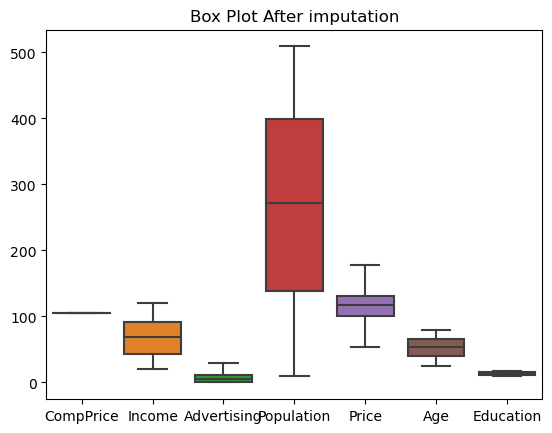

In [21]:
#The Boxplot  After imputation of the outliers
path = 'C:/Users/Sowmya Ganesh/Documents/Company_data_graphs'
file_path = os.path.join(path, 'Box_plot_after_imputation.png')
sns.boxplot(data=data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.title('Box Plot After imputation')
plt.savefig(file_path)
plt.show()


In [26]:
data.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [27]:
null_row = data.loc[data.isnull().any(axis=1)]
print(null_row)

    Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
174   NaN      105.0      24            0         358  177.5          2   79   

     Education  Urban  US  
174         15      0   0  


In [28]:
data.fillna(value=0,inplace=True)

In [29]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [30]:
#data in required form for modelling
path = 'C:/Users/Sowmya Ganesh/Documents/Company_data_after_Imputation.csv'
data.to_csv(path, index= False)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,105.0,73,11,276,120.0,0,42,17,1,1
1,1,105.0,48,16,260,83.0,1,65,10,1,1
2,1,105.0,35,10,269,80.0,2,59,12,1,1
3,0,105.0,100,4,466,97.0,2,55,14,1,1
4,0,105.0,64,3,340,128.0,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,105.0,108,17,203,128.0,1,33,14,1,1
396,0,105.0,23,3,37,120.0,2,55,11,0,1
397,0,105.0,26,12,368,159.0,2,40,18,1,1
398,0,105.0,79,7,284,95.0,0,50,12,1,1
